# Check point: Decision Trees & Random Forests

## Ali LAMINE

We are going to predict once again if a passenger on the Titanic is going to survive. This time  using decision trees and random forests: 

## 1. Read your Titanic dataset as usual: Create a training set and a testing set then apply decision tree. 

In [1]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
data= pd.read_csv("C:/Users/LENOVO/Desktop/titanic-passengers.csv", sep=";")
# preprocessing the data
def preprocess(new_data):
    new_data["Age"].fillna(new_data["Age"].mean(), inplace=True)
    new_data.replace({"Sex":{"male":1, "female":0}}, inplace=True)
    new_data["Cabin"]=new_data["Cabin"].fillna("G6")
    new_data.replace({"Survived":{"Yes":1, "No":0}}, inplace=True)
    return new_data

data=preprocess(data)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
# Creating a "Title" column
Title_Dictionary = {

                    "Capt":      "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "Countess" : "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }
def title (x):
    for i in range (len(x.split(" "))):
        if x.split(" ")[i][-1]==".":
            return Title_Dictionary[(x.split(" ")[i][:-1])]

data["Title"]=data["Name"].apply(title)

In [4]:
# Creation of "FamilySize" column
data["FamilySize"]= data["SibSp"] + data["Parch"]

In [5]:
# import relevant librairies
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score

In [6]:
# features extraction
x=data[["Pclass","Sex","Age","SibSp","Parch","Fare"]]
y=data["Survived"].values

In [16]:
# splitting the data with test size of 25%
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.25, random_state=0)
# applying the algorithm
clf=DecisionTreeClassifier(max_depth=3)
# fitting the training data
clf.fit(x_train,y_train)
# testing the model's performance
y_pred=clf.predict(x_test)
print("Accuracry={:.2f}".format(accuracy_score(y_test,y_pred)))

Accuracry=0.85


## 2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

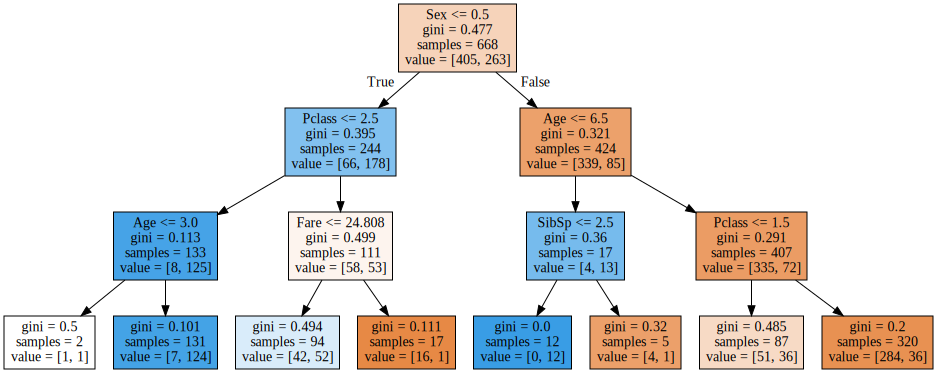

In [17]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=x_train.columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

If you are a man with an age>6.5 and in Pclass>1,5 you are more likely to die!!! 
if you are a women in second or first class with an age >3, you are more likely to live!!!

## 3. Change the decision tree parameters(at least two parameters). 

In [21]:
# changing the decision tree parapeters
clf=DecisionTreeClassifier(max_depth=5, max_leaf_nodes=12, criterion="entropy")

## 4. Calculate the new accuracy and compare it with the previous results. 

In [22]:
# fitting the training data
clf.fit(x_train,y_train)
# testing the model's performance
y_pred=clf.predict(x_test)
print("Accuracry={:.2f}".format(accuracy_score(y_test,y_pred)))

Accuracry=0.83


Accuracy has dropped from 0.85 to 0.83 when we fixed max_depth=5 , max_leaf_nodes=12 and criterion="entropy"

## 5. Use a random forest then change the number of estimators.

In [24]:
# import relevant libraries 
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred=RF.predict(x_test)
print("Accuracry={:.2f}".format(accuracy_score(y_test,y_pred)))

Accuracry=0.84


In [26]:
estimators=[50,100,150,200,250,300,350,400,450,500]
for n in estimators:
    RF=RandomForestClassifier(n_estimators=n)
    RF.fit(x_train, y_train)
    y_pred=RF.predict(x_test)
    print("Random Forest with n_estimators =",n)
    print("Accuracry={:.2f}".format(accuracy_score(y_test,y_pred)))
    print("------------------------------------------------------")

Random Forest with n_estimators = 50
Accuracry=0.86
------------------------------------------------------
Random Forest with n_estimators = 100
Accuracry=0.86
------------------------------------------------------
Random Forest with n_estimators = 150
Accuracry=0.86
------------------------------------------------------
Random Forest with n_estimators = 200
Accuracry=0.84
------------------------------------------------------
Random Forest with n_estimators = 250
Accuracry=0.85
------------------------------------------------------
Random Forest with n_estimators = 300
Accuracry=0.84
------------------------------------------------------
Random Forest with n_estimators = 350
Accuracry=0.86
------------------------------------------------------
Random Forest with n_estimators = 400
Accuracry=0.86
------------------------------------------------------
Random Forest with n_estimators = 450
Accuracry=0.86
------------------------------------------------------
Random Forest with n_estimato

## 6. Calculate the new accuracy and compare it with the previous result.

See 5.

Random Forest: Acc=0.86/
Decision Tree: Acc=0.85/
Random Forest slightly better 